# Pandas | Working with Missing Data

---
In this mission, we'll learn how to handle missing data without having to drop rows and columns using data on motor vehicle collisions released by New York City and published on the __[NYC OpenData website](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)__. There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added.

We'll work with an extract of the full data: __Crashes from the year 2018. We made several modifications to the data for teaching purposes, including randomly sampling the data to reduce its size.__


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
mvc = pd.read_csv("nypd_mvc_2018.csv")

In [3]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [4]:
mvc.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')

A summary of the columns and their data is below:

- __`unique_key`__: A unique identifier for each collision.
- __`date, time`__: Date and time of the collision.
- __`borough`__: The borough, or area of New York City, where the collision occurred.
- __`location`__: Latitude and longitude coordinates for the collision.
- __`on_street, cross_street, off_street`__: Details of the street or intersection where the collision occurred.
- __`pedestrians_injured`__: Number of pedestrians who were injured.
- __`cyclist_injured`__: Number of people traveling on a bicycle who were injured.
- __`motorist_injured`__: Number of people traveling in a vehicle who were injured.
- __`total_injured`__: Total number of people injured.
- __`pedestrians_killed`__: Number of pedestrians who were killed.
- __`cyclist_killed`__: Number of people traveling on a bicycle who were killed.
- __`motorist_killed`__: Number of people traveling in a vehicle who were killed.
- __`total_killed`__: Total number of people killed.
- __`vehicle_1 through vehicle_5`__: Type of each vehicle involved in the accident.
- __`cause_vehicle_1 through cause_vehicle_5`__: Contributing factor for each vehicle in the accident.

---
### Instructions

- We have read the CSV file into a pandas dataframe called __`mvc`__.

- Create a series that counts the number of null values in each of the columns in the mvc dataframe. Assign the result to __`null_counts`__.

In [5]:
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

### Instructions

We created a dataframe __`killed`__, containing the five columns that relate to people killed in collisions.

1. Select the first three columns from __`killed`__ and sum each row. Assign the result to __`killed_manual_sum`__.
2. Create a boolean mask that checks whether each value in __`killed_manual_sum`__ is not equal to the values in the __`total_killed`__ column. Assign the boolean mask to __`killed_mask`__.
3. Use __`killed_mask`__ to filter the rows in killed. Assign the result to __`killed_non_eq`__.

In [6]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

In [7]:
# solution 1
killed_manual_sum = killed['pedestrians_killed'] + killed['cyclist_killed'] + killed['motorist_killed']
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [8]:
# solution 2
killed_manual_sum = killed[['pedestrians_killed', 'cyclist_killed', 'motorist_killed']].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [9]:
# solution 3
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


### Instructions

We included the code to clean the killed columns. In addition, we've created an injured dataframe with just the injured columns and __`injured_manual_sum`__, a series manually summing the three individual injured columns.

1. Use __`Series.mask()`__ to replace any null values from the __`total_injured`__ column with their equivalents from the injured_manual_sum series.
2. Use __`Series.mask()`__ to replace any numbers from __`total_injured`__ that aren't equal to their equivalents in __`injured_manual_sum`__ with __`np.nan`__.


In [10]:
# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

In [11]:
injured_mask = injured_manual_sum != injured['total_injured']
injured[injured_mask].head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0


In [12]:
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [13]:
injured[injured_mask].head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,NaN
3263,0,0,3,NaN
3362,0,0,0,NaN
3508,0,0,0,NaN
10989,0,0,0,NaN


### Instructions

1. Assign the __`total_injured`__ column from the injured dataframe to the same column in the `mvc` dataframe.
2. Assign the __`total_killed`__ column from the killed dataframe to the same column in the `mvc` dataframe.

In [14]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

### Instructions

We created a function, __`plot_null_correlations()`__, which will plot correlations between null values in a dataframe.

- Use list comprehension to produce a list of column names containing the substring __`'vehicle'`__.
- Use the list of column names to select only those columns from the __`mvc`__ dataframe. Pass the result to the __`plot_null_correlations()`__ function.

In [15]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

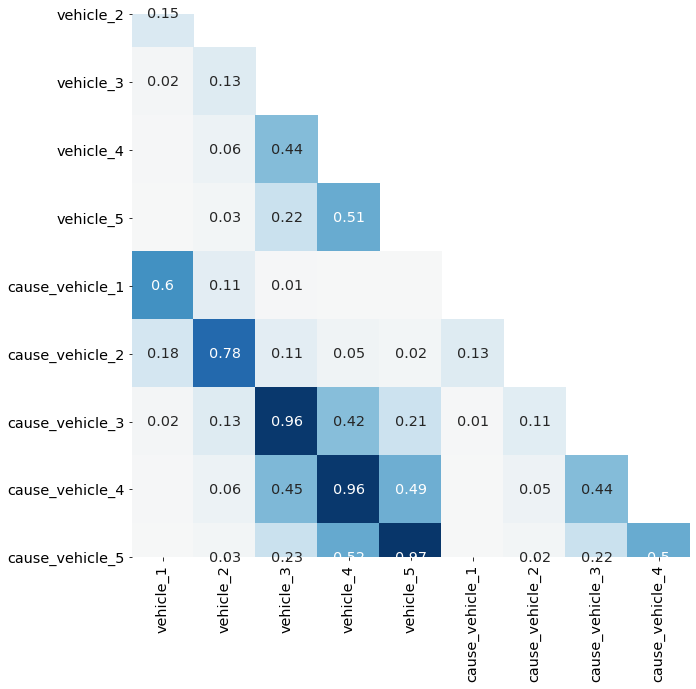

In [16]:
vehicle_cols = [col for col in mvc.columns if 'vehicle' in col]
plot_null_correlations(mvc[vehicle_cols])

### Instructions

__We provided the start of the loop you are going to build, including code that generates each column name as strings: `v_col` and `c_col`__

1. Uncomment the commented lines (you might want to use this __[keyboard shortcut](https://help.dataquest.io/article/93-do-you-have-keyboard-shortcuts#multiline)__).


2. Add code to the body of the loop that will:
    - Count the number of rows where the __`v_col`__ column is null and the __`c_col`__ column is not null. Assign the result to __`v_null`__.
    
    - Count the number of rows where the __`c_col`__ column is null and the __`v_col`__ column is not null. Assign the result to __`c_null`__.
    
    - Append an item to the `vc_null_data` list. The item should be a list containing, in order: __`v`__, __`v_null`__, __`c_null`__.
    

3. Outside the loop, create a dataframe using the __`vc_null_data`__ list of lists.
    - Use the columns parameter and the __`col_labels`__ list to set the column names of the dataframe.
    - Assign the dataframe to __`vc_null_df`__.

In [17]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v) # vehicle
    c_col = 'cause_vehicle_{}'.format(v) #cause
    v_null = mvc.loc[mvc[v_col].isnull()][c_col].notnull().sum()
    c_null = mvc.loc[mvc[c_col].isnull()][v_col].notnull().sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [18]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


### Instructions

We provided a list comprehension that identifies columns starting with the substring __`vehicle`__.

- Create a dataframe containing only the columns from __`mvc`__, identified by the list comprehension __`v_cols`__.
- Use __`DataFrame.stack()`__ to stack the values from the dataframe into a single series object.
- Use __`Series.value_counts()`__ to count the unique values from the stacked series. Assign the first 10 values to __`top10_vehicles`__.

In [19]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

In [20]:
vehicle = mvc[v_cols]
vehicle_1d = vehicle.stack()
top10_vehicles = vehicle_1d.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

### Instructions
In addition to the helper function, we provided the start of the loop you are going to build, including code that generates each column name as a string.

1. Uncomment the commented lines (you might want to use this keyboard shortcut).
2. Add code to the body of the loop that:
    - Creates a boolean mask for values where the vehicle column is null and the cause column is non-null.
    - Creates a boolean mask for values where the cause column is null and the vehicle column is non-null.
    - Uses the first boolean mask to fill matching values from the vehicle column with the string Unspecified.
    - Uses the second boolean mask to fill matching values from the cause column with the string Unspecified.
3. Outside the loop, use the __`summarize_missing()`__ function to check that you have removed all matching values. Assign the result to __`summary_after__`.

In [21]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

In [22]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    
    mvc[v_col] =  mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] =  mvc[c_col].mask(c_missing_mask, "Unspecified")
    
summary_after = summarize_missing()

summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


## Instructions

We read the supplemental data into a dataframe called `sup_data`. Additionally, we provided a list of the location columns, `location_col`s, and calculated the number of null values in these columns.

1. Loop over the column names in `location_cols`. In each iteration of the loop, use `Series.mask()` to replace values in the column in the `mvc` dataframe:
    - The mask should represent whether the values in column in the mvc has a null value or not.
    - Where the mask is true, the value should be replaced with the equivalent value in `sup_data`.

2. Calculate the number of null values across the location_cols columns in mvc after you adding the supplemental data. Assign the result to null_after.

In [23]:
def plot_null_matrix(df, figsize=(10,10)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(df_null, cbar=True, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

In [24]:
sup_data = pd.read_csv('supplemental_data.csv')

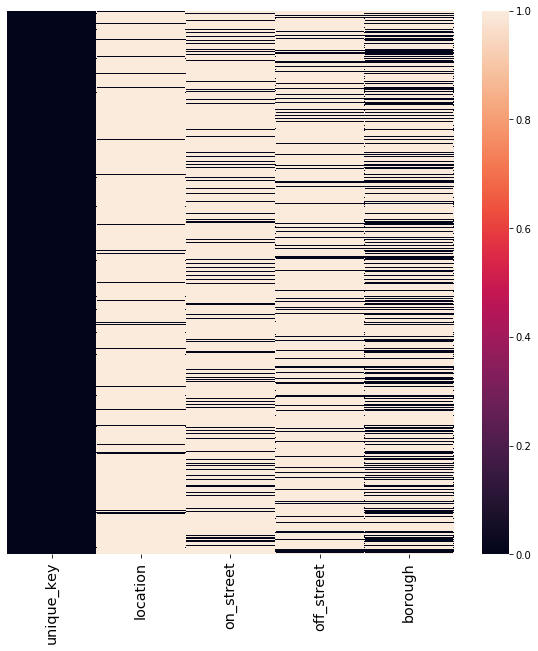

In [25]:
plot_null_matrix(sup_data)

In [26]:
location_cols = ['location', 'on_street', 'off_street', 'borough']

null_before = mvc[location_cols].isnull().sum()

for col_name in location_cols:
    null_mask = mvc[col_name].isnull()
    mvc[col_name] = mvc[col_name].mask(null_mask, sup_data[col_name])
    
null_after = mvc[location_cols].isnull().sum()

In [27]:
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [28]:
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

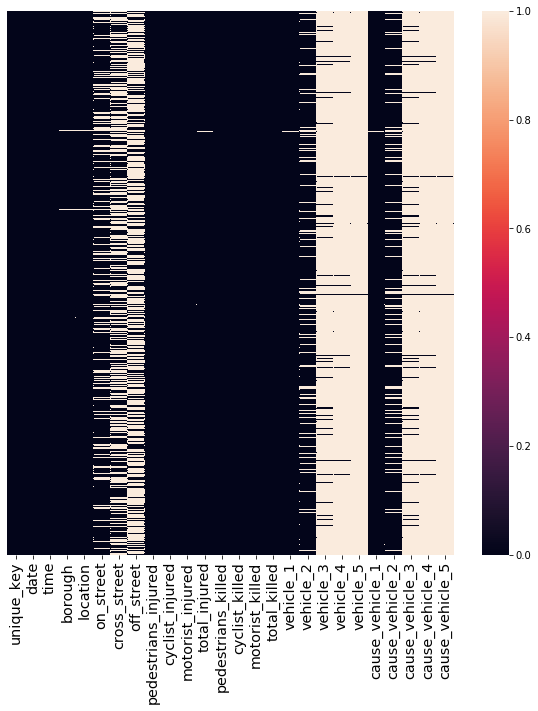

In [29]:
plot_null_matrix(mvc)